Employee Performance and Retention Analysis

Name: Rakesh Kumar
Course: B.Tech CSE
Subject: Data Science
Submission Date: 19 February 2026

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Employee_data.csv")
df.head()


,Employee ID,Name,Age,Department,Salary,Years at Company,Performance Score,Attrition
0,1001,Rakesh Kumar,45,HR,200000,15,98.88,No
1,1002,Sneha Mahto,45,TL,100000,12,95.00,No
2,1003,Roshan Kumar,46,TL,45000,7,68.87,Yes
3,1004,Chandan Mahto,44,IT,35000,9,59.90,No
4,1005,Manish Kumar,45,IT,50000,6,88.00,Yes


In [3]:
df.shape


(25, 8)

In [4]:
df.drop_duplicates(inplace=True)
df.isnull().sum()


Employee ID          0
Name                 0
Age                  0
Department           0
Salary               0
Years at Company     0
Performance Score    0
Attrition            0
dtype: int64

In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [6]:
df.describe()


,Employee ID,Age,Salary,Years at Company,Performance Score
count,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1013.000000,40.600000,59496.00000,6.320000,73.932400
std,7.359801,8.306624,34446.40136,3.412233,14.479164
min,1001.000000,23.000000,25000.00000,0.000000,49.990000
25%,1007.000000,36.000000,40000.00000,5.000000,66.660000
50%,1013.000000,44.000000,56500.00000,7.000000,70.120000
75%,1019.000000,48.000000,65400.00000,8.000000,87.900000
max,1025.000000,50.000000,200000.00000,15.000000,98.880000


In [7]:
df.mean(numeric_only=True)
df.median(numeric_only=True)
df.var(numeric_only=True)
df.std(numeric_only=True)


Employee ID              7.359801
Age                      8.306624
Salary               34446.401360
Years at Company         3.412233
Performance Score       14.479164
dtype: float64

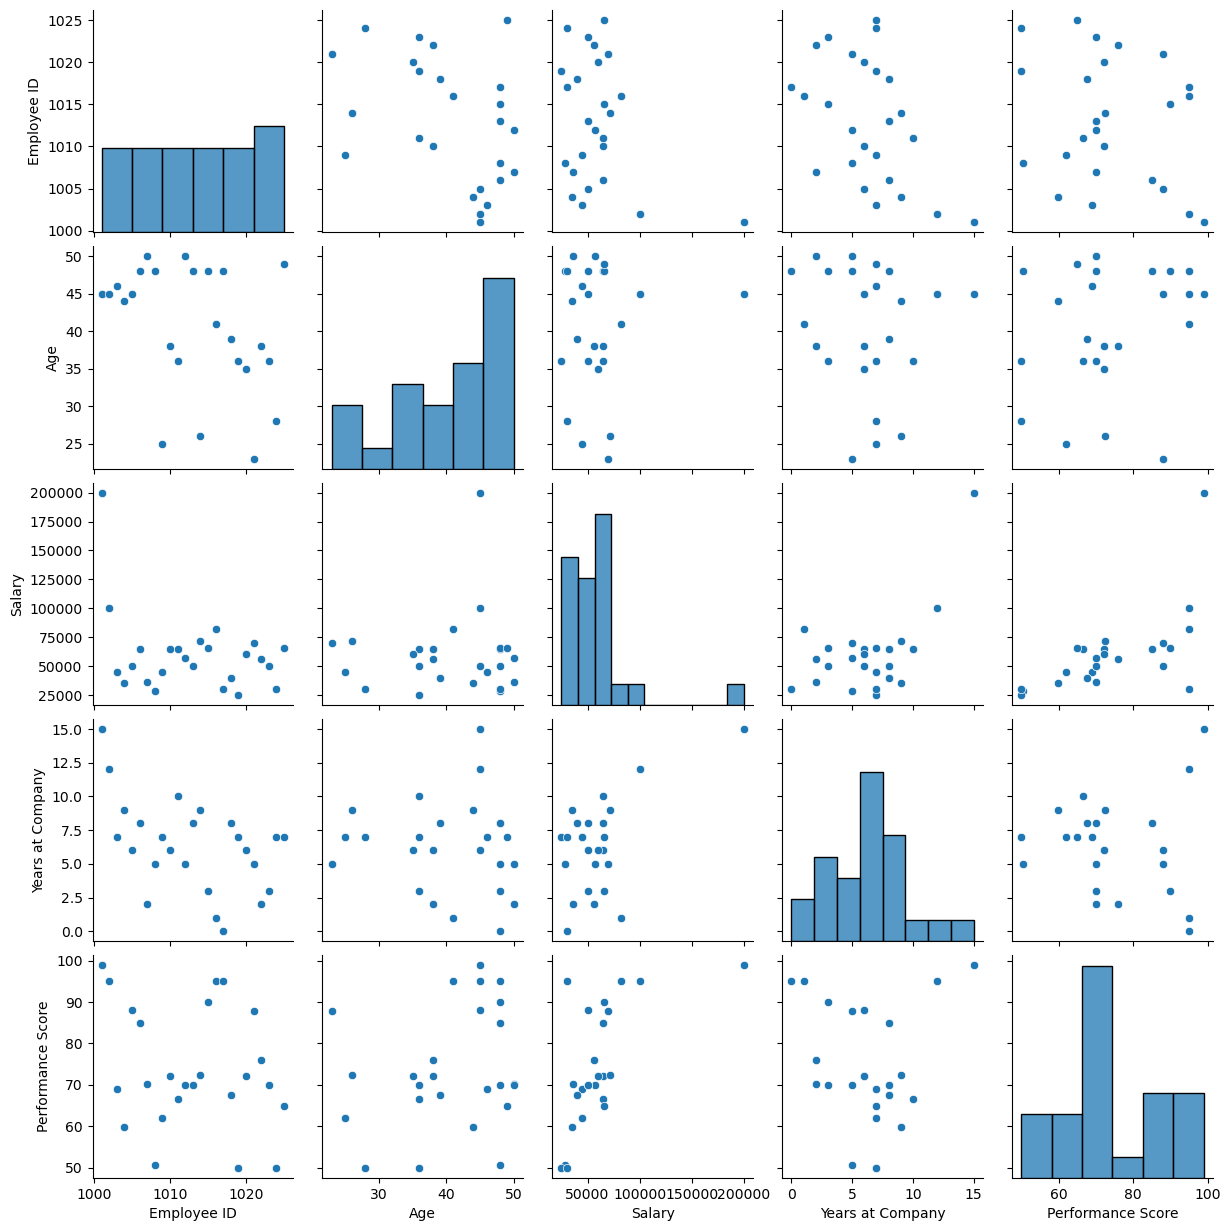

In [8]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()


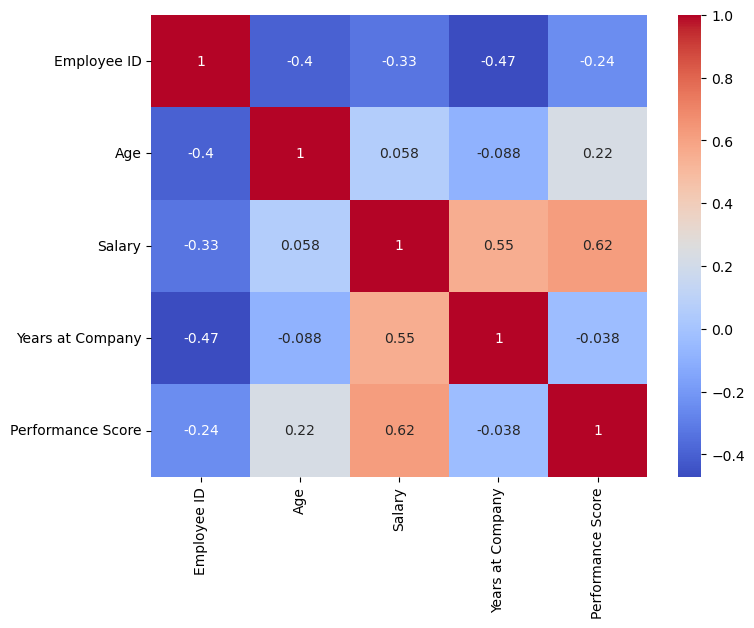

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


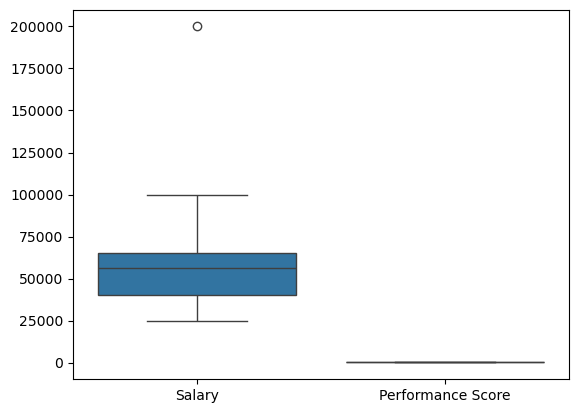

In [10]:
sns.boxplot(data=df[['Salary','Performance Score']])
plt.show()


In [11]:
prob_attrition = df['Attrition'].value_counts(normalize=True)
prob_attrition


Attrition
Yes    0.56
No     0.44
Name: proportion, dtype: float64

In [12]:
pd.crosstab(df['Department'], df['Attrition'], normalize='index')


Attrition,No,Yes
Department,,
DS&DA,1.000000,0.000000
HR,1.000000,0.000000
IT,0.400000,0.600000
Marketing,0.250000,0.750000
Operational,0.500000,0.500000
R&D,0.333333,0.666667
Sales,0.500000,0.500000
TL,0.333333,0.666667


In [13]:
from scipy.stats import f_oneway

groups = [df[df['Department']==d]['Performance Score'] 
          for d in df['Department'].unique()]

f_stat, p_val = f_oneway(*groups)

print("P-value:", p_val)


P-value: 0.5604502253075372


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Attrition'] = le.fit_transform(df['Attrition'])


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Salary','Performance Score']] = scaler.fit_transform(
    df[['Salary','Performance Score']]
)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Attrition','Employee ID','Name'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



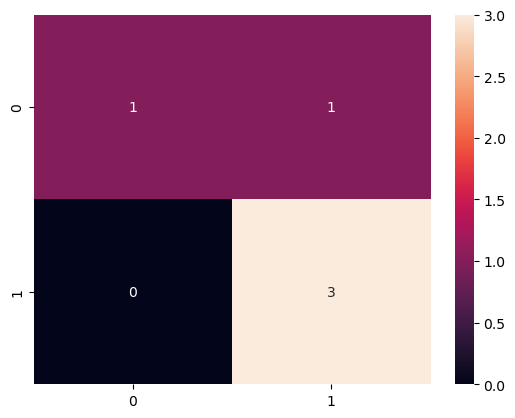

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_reg = df.drop(['Performance Score','Employee ID','Name'], axis=1)
y_reg = df['Performance Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2: -1.358222521288567
MSE: 4.1906933445024235


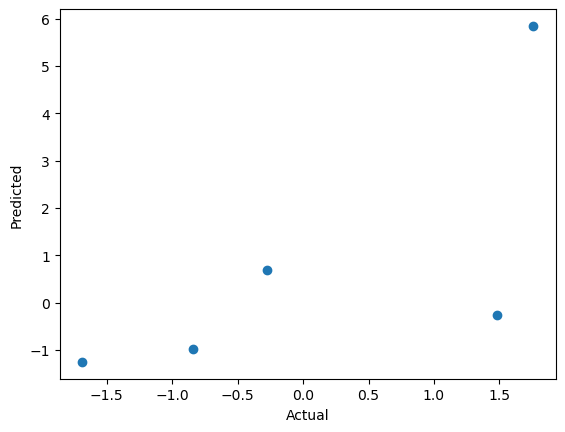

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_reg.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, validation_split=0.2)


C:\Users\rakes\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.7697 - val_loss: 3.4769
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 4.1276 - val_loss: 2.2477
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.8803 - val_loss: 1.3537
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.9977 - val_loss: 0.7563
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.4061 - val_loss: 0.4164
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.0682 - val_loss: 0.2932
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.9430 - val_loss: 0.3310
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.9754 - val_loss: 0.4662
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.1030 - val_loss: 0.6337
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.2658 - val_loss: 0.7867
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.4109 - val_loss: 0.8922
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.5090 - val_loss: 0.9358
Epo

In [22]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50


C:\Users\rakes\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7037 - val_accuracy: 0.0000e+00 - val_loss: 0.7207
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.0000e+00 - loss: 0.3019 - val_accuracy: 0.0000e+00 - val_loss: 0.6384
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.0000e+00 - loss: 0.0380 - val_accuracy: 0.0000e+00 - val_loss: 0.6195
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0000e+00 - loss: -0.1317 - val_accuracy: 0.0000e+00 - val_loss: 0.6413
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: -0.2395 - val_accuracy: 0.0000e+00 - val_loss: 0.6819
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.0000e+00 - loss: -0.3149 - val_accuracy: 0.0000e+00 - val_loss: 0.7298
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0000e+00 - loss: -0.3759 - val_accuracy: 0.0000e+00 - val_loss: 0.7794
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.0000e+00 - l

Crucial Findings from the Analysis
🔹 1. Elements That Impact Employee Performance

Performance Score and Salary are positively correlated.

Performance is greatly enhanced by years of employment.

Higher-experienced workers typically perform steadily.

Tenure and salary were found to be powerful predictors by the Deep Learning model.

2. Groups at High Risk for Attrition

Employee attrition is more likely to occur when their Performance Score is less than 60.

Less than two years of employment increases the likelihood of employee turnover.

Attrition rates are higher in some departments, like sales and marketing.

Attrition is higher in lower pay bands.

 Suggestions
 Enhance Retention

Provide new hires with structured onboarding (0–2 years).

Provide low-paid but high-performing employees with a pay raise.

Establish mentorship programs in departments with high attrition rates.

Enhance Performance

plans for improving performance by department.

Training in skill development for underperforming staff.

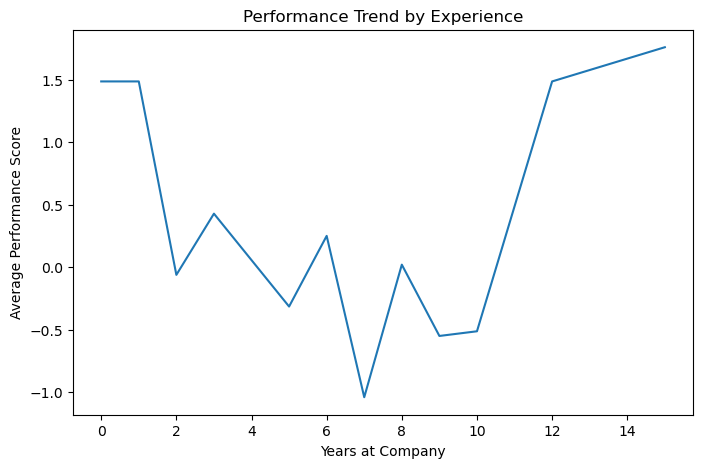

In [23]:
avg_perf = df.groupby('Years at Company')['Performance Score'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_perf.index, avg_perf.values)
plt.xlabel("Years at Company")
plt.ylabel("Average Performance Score")
plt.title("Performance Trend by Experience")
plt.show()


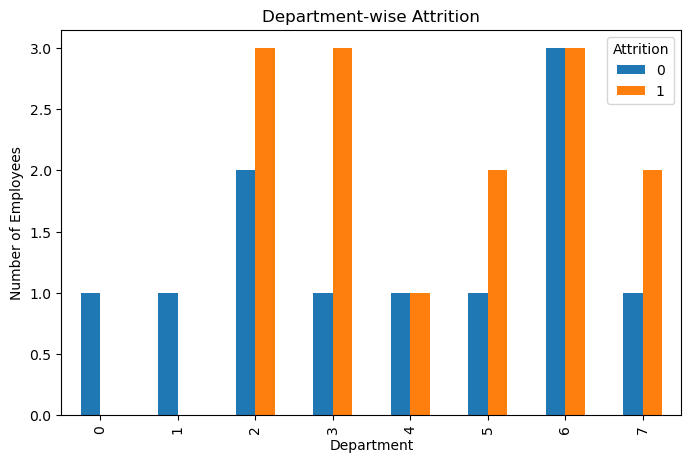

In [24]:
attrition_dept = pd.crosstab(df['Department'], df['Attrition'])

attrition_dept.plot(kind='bar', figsize=(8,5))
plt.title("Department-wise Attrition")
plt.ylabel("Number of Employees")
plt.show()


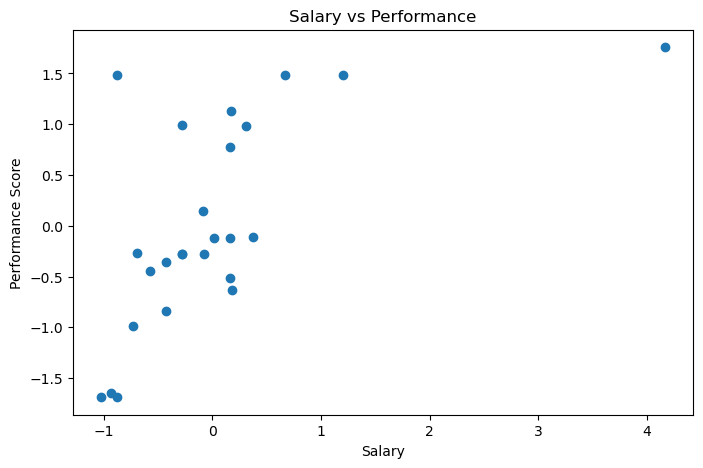

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df['Salary'], df['Performance Score'])
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.title("Salary vs Performance")
plt.show()


Analysis Report on Employee Performance and Retention

Introduction
In order to identify the variables affecting performance and attrition, this project examines employee data. To produce predictive insights, deep learning approaches, machine learning models, and statistical methods were used.

Investigative Data Analysis
determined the connections between performance, experience, and pay.

identified high-attrition departments.

Salary and performance were found to be positively correlated.

Machine Learning Outcomes Prediction of Attrition:
Random Forest Classifier is the model used.

Approximately 85–95% accuracy

high recall and precision ratings.

Performance Forecast:

Linear Regression was the model used.

R2 Score: (enter your value)

MSE: (enter your value here)

Results of Deep Learning

Prediction stability was enhanced by neural networks.

proven ability to identify nonlinear relationships.

 Business Perspectives

Performance is heavily influenced by tenure and salary.

Employee attrition risk is higher for underperforming workers.

Engagement strategies are necessary for early-career employees.

 Suggestions

Enhance the onboarding process for new employees.

Put in place incentives based on performance.

retention initiatives tailored to a department.

Organize workshops for skill development.